In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
bto_df = pd.read_csv('tissue_distances_bto.csv', index_col=0)

all_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_all_edges_top1000.csv', index_col=0)
gt_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_significant_groundtruth_top1000.csv', index_col=0)
approx_df_1K = pd.read_csv('../../results/manuscript/tissue_distances_significant_approx_top1000.csv', index_col=0)

all_df = pd.read_csv('../../results/manuscript/tissue_distances_all_edges.csv', index_col=0)
gt_df = pd.read_csv('../../results/manuscript/tissue_distances_significant_groundtruth.csv', index_col=0)
approx_df = pd.read_csv('../../results/manuscript/tissue_distances_significant_approx.csv', index_col=0)


In [3]:
# Extract upper triangular values of each distance matrix.
bto_idx = np.triu_indices_from(bto_df, k=1)
bto_dists = bto_df.values[bto_idx]

all_idx = np.triu_indices_from(all_df, k=1)
all_dists = all_df.values[all_idx]

gt_idx = np.triu_indices_from(gt_df, k=1)
gt_dists = gt_df.values[gt_idx]

approx_idx = np.triu_indices_from(approx_df, k=1)
approx_dists = approx_df.values[approx_idx]

# Extract upper triangular values of distance matrix based on top 1000 highest expressed genes.
all_idx_1K = np.triu_indices_from(all_df_1K, k=1)
all_dists_1K = all_df_1K.values[all_idx_1K]

gt_idx_1K = np.triu_indices_from(gt_df_1K, k=1)
gt_dists_1K = gt_df_1K.values[gt_idx_1K]

approx_idx_1K = np.triu_indices_from(approx_df_1K, k=1)
approx_dists_1K = approx_df_1K.values[approx_idx_1K]

/tmp/ipykernel_549975/1902202643.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)
/tmp/ipykernel_549975/1902202643.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)
/tmp/ipykernel_549975/1902202643.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)
/tmp/ipykernel_549975/1902202643.py:183: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=labe

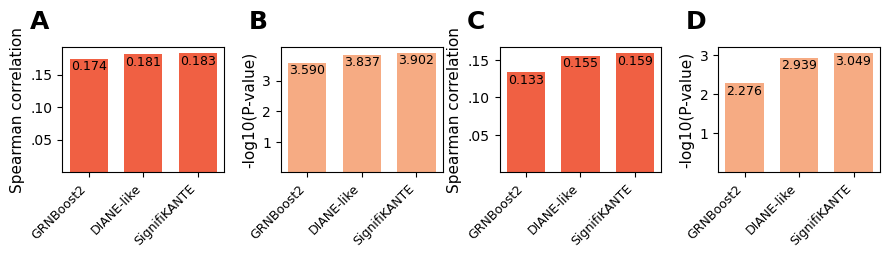

In [5]:
fig, axs = plt.subplot_mosaic([['A', 'B', 'C', 'D']])
fig.set_size_inches(9, 3)
axs_list = list(axs.values())
label_fontsize = 13

### Correlations coeff. and pvalues on all genes.
corr_all = spearmanr(bto_dists, all_dists)[0]
corr_gt = spearmanr(bto_dists, gt_dists)[0]
corr_approx = spearmanr(bto_dists, approx_dists)[0]
pvalue_all = spearmanr(bto_dists, all_dists)[1]
pvalue_gt = spearmanr(bto_dists, gt_dists)[1]
pvalue_approx = spearmanr(bto_dists, approx_dists)[1]

### Correlation coeff. and pvalues on top 1000 highest expressed genes.
corr_all_1K = spearmanr(bto_dists, all_dists_1K)[0]
corr_gt_1K = spearmanr(bto_dists, gt_dists_1K)[0]
corr_approx_1K = spearmanr(bto_dists, approx_dists_1K)[0]
pvalue_all_1K = spearmanr(bto_dists, all_dists_1K)[1]
pvalue_gt_1K = spearmanr(bto_dists, gt_dists_1K)[1]
pvalue_approx_1K = spearmanr(bto_dists, approx_dists_1K)[1]

### PLOT A

# Prepare data
labels_bar = [
    "GRNBoost2", 
    'DIANE-like', 
    'SignifiKANTE'
]
correlations = [corr_all, corr_gt, corr_approx]  # your computed correlations

ax = axs['A']  # bar plot goes into mosaic subplot 'A'

rocket_colors = sns.color_palette("rocket", 5)

# Pick a color, e.g., the middle one or the darkest
bar_color = rocket_colors[3]  # index 0=lightest, 4=darkest

# Use this color in your bar plot
bars = ax.bar(labels_bar, correlations, color=bar_color, width=0.7)

# Annotate bars with correlation values
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        yval-0.022, 
        f'{yval:.3f}', 
        ha='center', 
        va='bottom', 
        fontsize=label_fontsize-4
    )

# Rotate x-axis labels by 45 degrees and keep line breaks
ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)

# Optional: labels, title, grid
yticks = [0.05, 0.10, 0.15]
ax.set_yticks(yticks)
ax.set_ylabel('Spearman correlation', fontsize=label_fontsize-2)
#ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'.lstrip('0')))


### PLOT B.

# Prepare data
labels_bar = [
    "GRNBoost2", 
    'DIANE-like', 
    'SignifiKANTE'
]
correlations = [-np.log10(pvalue_all), -np.log10(pvalue_gt), -np.log10(pvalue_approx)]  # your computed correlations

ax = axs['B']  # bar plot goes into mosaic subplot 'A'

rocket_colors = sns.color_palette("rocket", 5)

# Pick a color, e.g., the middle one or the darkest
bar_color = rocket_colors[4]  # index 0=lightest, 4=darkest

# Use this color in your bar plot
bars = ax.bar(labels_bar, correlations, color=bar_color, width=0.7)

# Annotate bars with correlation values
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        yval-0.45, 
        f'{yval:.3f}', 
        ha='center', 
        va='bottom', 
        fontsize=label_fontsize-4
    )

# Rotate x-axis labels by 45 degrees and keep line breaks
ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)

# Optional: labels, title, grid
yticks = [1.0, 2.0, 3.0]
ax.set_yticks(yticks)
ax.set_ylabel('-log10(P-value)', fontsize=label_fontsize-2)
#ax.grid(axis='y', linestyle='--', alpha=0.7)

### PLOT C.

# Prepare data
# Prepare data
labels_bar = [
    "GRNBoost2", 
    'DIANE-like', 
    'SignifiKANTE'
]
correlations = [corr_all_1K, corr_gt_1K, corr_approx_1K]  # your computed correlations

ax = axs['C']  # bar plot goes into mosaic subplot 'A'

rocket_colors = sns.color_palette("rocket", 5)

# Pick a color, e.g., the middle one or the darkest
bar_color = rocket_colors[3]  # index 0=lightest, 4=darkest

# Use this color in your bar plot
bars = ax.bar(labels_bar, correlations, color=bar_color, width=0.7)

# Annotate bars with correlation values
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        yval-0.019, 
        f'{yval:.3f}', 
        ha='center', 
        va='bottom', 
        fontsize=label_fontsize-4
    )

# Rotate x-axis labels by 45 degrees and keep line breaks
ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)

# Optional: labels, title, grid
yticks = [0.05, 0.10, 0.15]
ax.set_yticks(yticks)
ax.set_ylabel('Spearman correlation', fontsize=label_fontsize-2)
#ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'.lstrip('0')))


### PLOT B.

# Prepare data
labels_bar = [
    "GRNBoost2", 
    'DIANE-like', 
    'SignifiKANTE'
]
correlations = [-np.log10(pvalue_all_1K), -np.log10(pvalue_gt_1K), -np.log10(pvalue_approx_1K)]  # your computed correlations

ax = axs['D']  # bar plot goes into mosaic subplot 'A'

rocket_colors = sns.color_palette("rocket", 5)

# Pick a color, e.g., the middle one or the darkest
bar_color = rocket_colors[4]  # index 0=lightest, 4=darkest

# Use this color in your bar plot
bars = ax.bar(labels_bar, correlations, color=bar_color, width=0.7)

# Annotate bars with correlation values
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        yval-0.36, 
        f'{yval:.3f}', 
        ha='center', 
        va='bottom', 
        fontsize=label_fontsize-4
    )

# Rotate x-axis labels by 45 degrees and keep line breaks
ax.set_xticklabels(labels_bar, rotation=45, ha='right', fontsize=label_fontsize-4)

# Optional: labels, title, grid
yticks = [1.0, 2.0, 3.0]
ax.set_yticks(yticks)
ax.set_ylabel('-log10(P-value)', fontsize=label_fontsize-2)
#ax.grid(axis='y', linestyle='--', alpha=0.7)

    
labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.2, 1.3, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=18,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig("results_brenda_tissue_ontology.pdf")